# Traffic Light Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing.image import array_to_img, img_to_array
from keras import backend as K

%matplotlib inline

Using TensorFlow backend.


## CNN

In [2]:
img_width, img_height = 150, 150

if K.image_dim_ordering() != 'tf':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [3]:
K.image_dim_ordering()

'tf'

### Train Model

In [4]:
batch_size = 16
epochs = 100

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(
    directory='data/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8840 images belonging to 4 classes.


In [7]:
nb_class = train_generator.nb_class
classes = train_generator.class_indices
nb_train_samples = train_generator.nb_sample

In [8]:
nb_train_samples

8840

In [9]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [10]:
%%time

model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=epochs)

Epoch 1/100
8840/8840 [==============================] - 152s - loss: 1.2082 - acc: 0.4350   
Epoch 2/100
8840/8840 [==============================] - 115s - loss: 0.8162 - acc: 0.6590   
Epoch 3/100
8840/8840 [==============================] - 115s - loss: 0.6413 - acc: 0.7439   
Epoch 4/100
8840/8840 [==============================] - 115s - loss: 0.5219 - acc: 0.7903   
Epoch 5/100
8840/8840 [==============================] - 115s - loss: 0.4710 - acc: 0.8102   
Epoch 6/100
8840/8840 [==============================] - 115s - loss: 0.4075 - acc: 0.8382   
Epoch 7/100
8840/8840 [==============================] - 115s - loss: 0.3703 - acc: 0.8497   - ETA: 9s - l - ETA: 3s - loss: 0
Epoch 8/100
8840/8840 [==============================] - 115s - loss: 0.3449 - acc: 0.8654   
Epoch 9/100
8840/8840 [==============================] - 115s - loss: 0.3144 - acc: 0.8755   
Epoch 10/100
8840/8840 [==============================] - 115s - loss: 0.2922 - acc: 0.8822   
Epoch 11/100
8840/8840 [==

8840/8840 [==============================] - 114s - loss: 0.0827 - acc: 0.9734   
Epoch 86/100
8840/8840 [==============================] - 115s - loss: 0.0687 - acc: 0.9748   
Epoch 87/100
8840/8840 [==============================] - 115s - loss: 0.0736 - acc: 0.9736   
Epoch 88/100
8840/8840 [==============================] - 115s - loss: 0.0650 - acc: 0.9751   - ETA: 0s - loss: 0.0651 - acc: 0.97
Epoch 89/100
8840/8840 [==============================] - 115s - loss: 0.0802 - acc: 0.9727   
Epoch 90/100
8840/8840 [==============================] - 115s - loss: 0.0791 - acc: 0.9717   
Epoch 91/100
8840/8840 [==============================] - 115s - loss: 0.0710 - acc: 0.9733   
Epoch 92/100
8840/8840 [==============================] - 115s - loss: 0.0690 - acc: 0.9730   
Epoch 93/100
8840/8840 [==============================] - 115s - loss: 0.0788 - acc: 0.9734   
Epoch 94/100
8840/8840 [==============================] - 115s - loss: 0.0735 - acc: 0.9749   
Epoch 95/100
8840/8840 [===

### Save Model

In [11]:
model_name = 'model_keras_v1.2.0_%d_%d_%d_%d' % (nb_train_samples, batch_size, 
                                                 epochs, int(time() * 1e6))
model_name

'model_keras_v1.2.0_8840_16_100_1507442235973331'

In [12]:
model.save_weights(model_name + '.h5') 

In [13]:
model_json = model.to_json()

In [14]:
with open(model_name + '.json', "w") as json_file:
    json_file.write(model_json)

### Test Model

In [15]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

test_generator = train_datagen.flow_from_directory(
    'data/loop_with_traffic_light/training',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1151 images belonging to 4 classes.


In [16]:
%%time

i = 0
for images in test_generator:
    print(images[0].shape)
    predictions = model.predict(images[0])
    i += 1
    if i > 0:
        break

(16, 150, 150, 3)
CPU times: user 564 ms, sys: 24 ms, total: 588 ms
Wall time: 887 ms


### Visualize Examples

In [17]:
class_to_idx = train_generator.class_indices
class_to_idx

{'green': 0, 'red': 1, 'unknown': 2, 'yellow': 3}

#### Overlay Color Labels

In [18]:
red = Image.new('RGB', (img_width, 10), (255, 0, 0))
green = Image.new('RGB', (img_width, 10), (0, 255, 0))
yellow = Image.new('RGB', (img_width, 10), (244, 219, 36))
unknown = Image.new('RGB', (img_width, 10), (0, 0, 0))

In [19]:
idx_to_class = {}
idx_to_overlay = {}

In [20]:
for k, v in class_to_idx.items():
    idx_to_class[v] = k
    idx_to_overlay[v] = eval(k)

In [21]:
idx_to_class

{0: 'green', 1: 'red', 2: 'unknown', 3: 'yellow'}

In [22]:
idx_to_overlay

{0: <PIL.Image.Image image mode=RGB size=150x10 at 0x7F58DA4D0FC8>,
 1: <PIL.Image.Image image mode=RGB size=150x10 at 0x7F58DA4FCC20>,
 2: <PIL.Image.Image image mode=RGB size=150x10 at 0x7F58DA4D28C0>,
 3: <PIL.Image.Image image mode=RGB size=150x10 at 0x7F58DA4D2B90>}

#### Sample Images from Several Sources

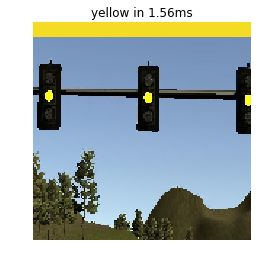

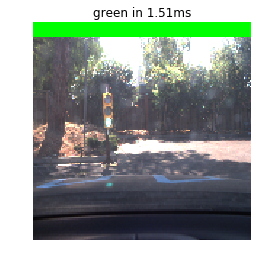

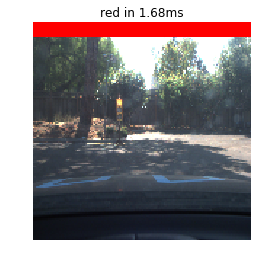

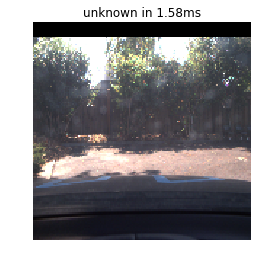

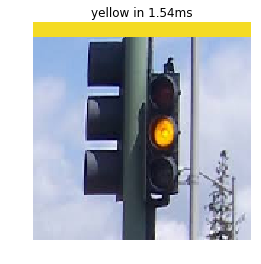

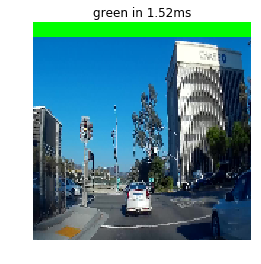

CPU times: user 616 ms, sys: 672 ms, total: 1.29 s
Wall time: 553 ms


In [35]:
%%time

images = [
    load_img('data/simulator_traffic_light/training/yellow/sim-1506291430325470.jpeg'),
    load_img('data/loop_with_traffic_light/training/green/1503524655778037037.png'),
    load_img('data/just_traffic_light/training/red/1503524771576164202.png'),
    load_img('data/just_traffic_light/training/unknown/1503524776309465909.png'),
    load_img('data/internet/yellow/yellow-internet-0013.jpg'),
    load_img('data/dashcam/green/2017_0929_172227_530-000051.jpg'),
]

for image in images:
    
    # Pipeline start time
    start = time()
    
    # Resize to 150x150
    img = image.resize((img_width, img_height))

    # Normalized numpy array with shape (150, 150, 3)
    x = img_to_array(img, dim_ordering='tf') / 255.

    # Numpy array with shape (1, 150, 150, 3)
    x = x.reshape((1,) + x.shape)
    
    prediction = model.predict(x)
    
    pred_idx = np.argmax(prediction[0])
    img.paste(idx_to_overlay[pred_idx], (0, 0))
    
    # Pipeline end prediction time
    end = time()
    
    plt.imshow(img)
    plt.title('%s in %4.2fms' % (idx_to_class[pred_idx], (end - start) * 1000))
    plt.axis('off')
    plt.show()